In [1]:
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

plt.rcParams.update({'font.size': 22})
tfd = tfp.distributions

2023-09-07 18:06:55.047591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 18:06:55.087561: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 18:06:55.088066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 18:06:55.959980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def create_dataset(n, x_range):
    x_uniform_dist = tfd.Uniform(low=x_range[0], high=x_range[1])
    x = x_uniform_dist.sample(n).numpy() [:, np.newaxis] 
    y_true = 2.7*x+3
    eps_uniform_dist = tfd.Normal(loc=0, scale=1)
    eps = eps_uniform_dist.sample(n).numpy() [:, np.newaxis] *0.74*x
    y = y_true + eps
    return x, y, y_true

In [3]:
x_train, y_train, y_true = create_dataset(2000, [-10, 10])
x_val, y_val, _ = create_dataset(500, [-10, 10])

2023-09-07 18:06:57.095307: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


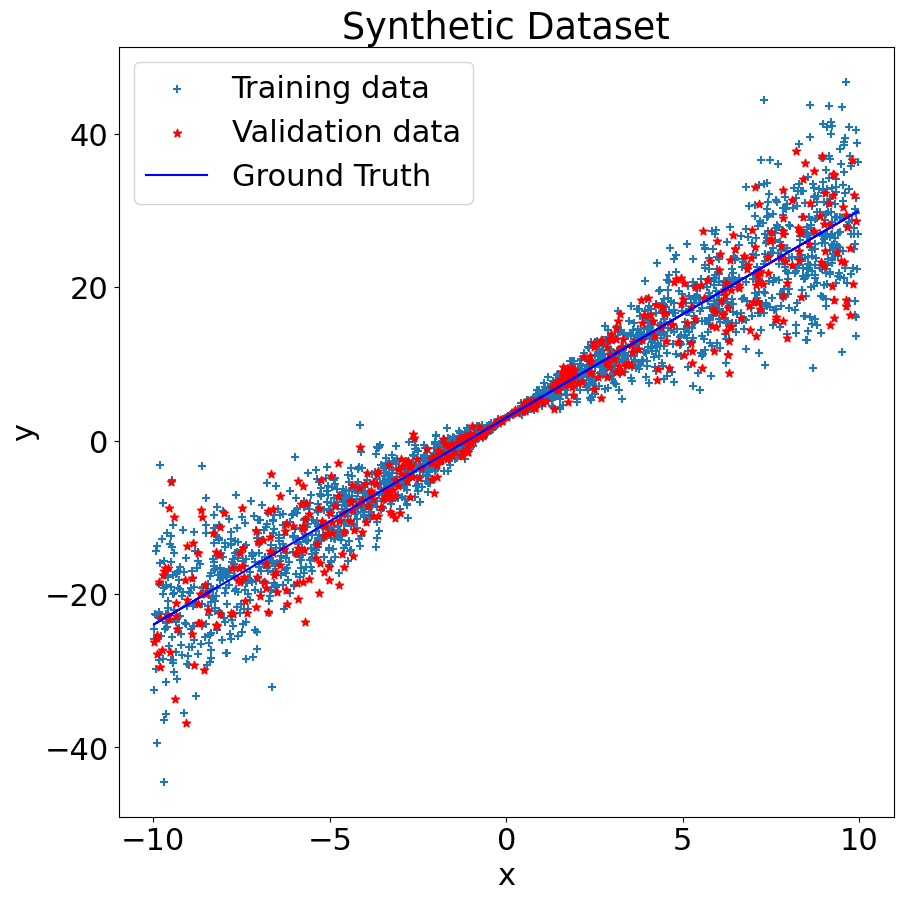

In [4]:
def plot_dataset(x_train, y_train, x_val, y_val, y_true, title):
    fig = plt.figure(figsize = (10, 10))
    plt.scatter(x_train, y_train, marker='+', label='Training data')
    plt.scatter(x_val, y_val, marker='*', color='r', label='Validation data')
    plt.plot(x_train, y_true, color='b', label='Ground Truth')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_dataset(x_train, y_train, x_val, y_val, y_true, 'Synthetic Dataset')

In [5]:
x_test = np.linspace(-10, 10, 1000).reshape(-1, 1)

## Building a regression model using TensorFlow

In [6]:
# Model Architecture
model = Sequential([Dense(1, input_shape=(1,))])

# Compile
model.compile(loss='mse', optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
63/63 [==============================] - 0s 810us/step - loss: 61.1768
Epoch 2/100
63/63 [==============================] - 0s 763us/step - loss: 56.8506
Epoch 3/100
63/63 [==============================] - 0s 778us/step - loss: 52.8566
Epoch 4/100
63/63 [==============================] - 0s 745us/step - loss: 49.2426
Epoch 5/100
63/63 [==============================] - 0s 800us/step - loss: 45.9453
Epoch 6/100
63/63 [==============================] - 0s 776us/step - loss: 42.9239
Epoch 7/100
63/63 [==============================] - 0s 872us/step - loss: 40.1976
Epoch 8/100
63/63 [==============================] - 0s 756us/step - loss: 37.7303
Epoch 9/100
63/63 [==============================] - 0s 782us/step - loss: 35.5111
Epoch 10/100
63/63 [==============================] - 0s 733us/step - loss: 33.5243
Epoch 11/100
63/63 [==============================] - 0s 779us/step - loss: 31.7495
Epoch 12/100
63/63 [==============================] - 0s 770us/step - loss: 30.1569
E

63/63 [==============================] - 0s 776us/step - loss: 17.0997
Epoch 99/100
63/63 [==============================] - 0s 635us/step - loss: 17.0944
Epoch 100/100
63/63 [==============================] - 0s 709us/step - loss: 17.0971


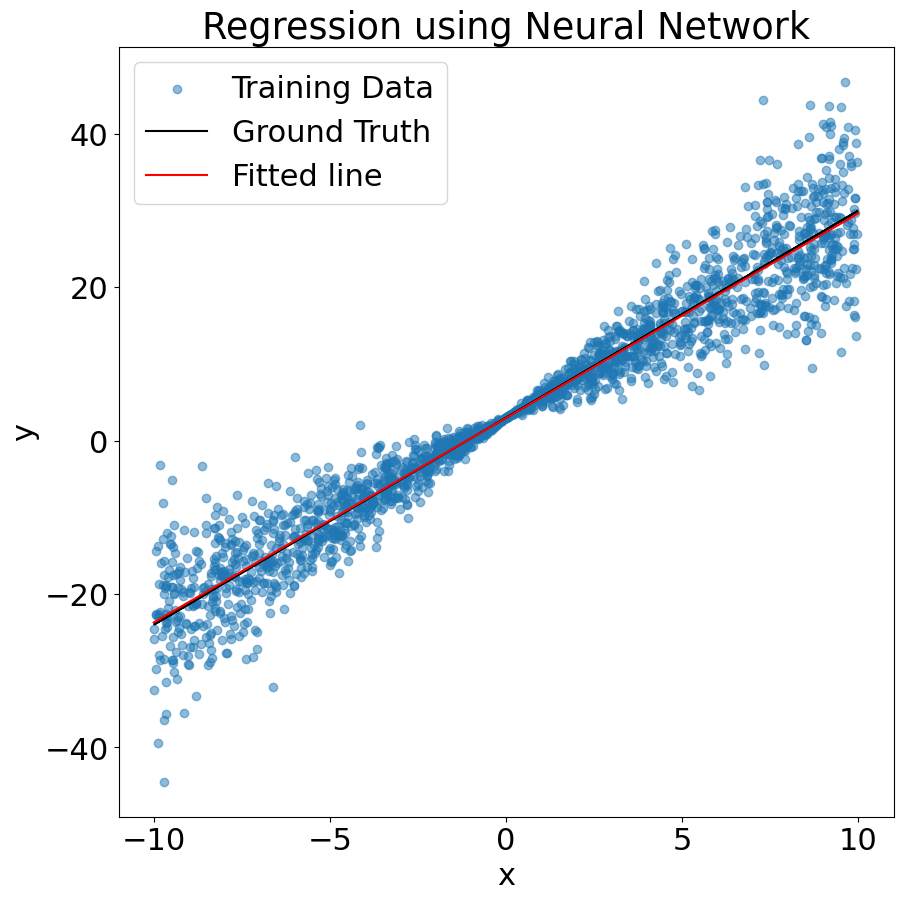

In [7]:
y_pred = model(x_test)

# Plot the data and a trained regression line
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, alpha=.5, label='Training Data')
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_pred, label='Fitted line', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression using Neural Network')
plt.legend()
plt.show()

## Probabilistic neural networks for aleatory uncertainty

In [8]:
model = Sequential([Dense(2, input_shape=(1,)),
                    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[..., :1],
                                                                       scale=0.3+tf.math.abs(t[..., 1:])))
                   ])

In [9]:
# Define negative loglikelihood loss function
def neg_loglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [10]:
model.compile(loss=neg_loglik, optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
63/63 [==============================] - 0s 754us/step - loss: 37.6348
Epoch 2/500
63/63 [==============================] - 0s 737us/step - loss: 26.5860
Epoch 3/500
63/63 [==============================] - 0s 722us/step - loss: 21.0421
Epoch 4/500
63/63 [==============================] - 0s 709us/step - loss: 17.6069
Epoch 5/500
63/63 [==============================] - 0s 683us/step - loss: 15.2554
Epoch 6/500
63/63 [==============================] - 0s 699us/step - loss: 13.5277
Epoch 7/500
63/63 [==============================] - 0s 693us/step - loss: 12.2008
Epoch 8/500
63/63 [==============================] - 0s 791us/step - loss: 11.1440
Epoch 9/500
63/63 [==============================] - 0s 735us/step - loss: 10.2846
Epoch 10/500
63/63 [==============================] - 0s 684us/step - loss: 9.5658
Epoch 11/500
63/63 [==============================] - 0s 694us/step - loss: 8.9533
Epoch 12/500
63/63 [==============================] - 0s 965us/step - loss: 8.4253
Epoc

63/63 [==============================] - 0s 814us/step - loss: 2.5108
Epoch 100/500
63/63 [==============================] - 0s 770us/step - loss: 2.5061
Epoch 101/500
63/63 [==============================] - 0s 671us/step - loss: 2.5016
Epoch 102/500
63/63 [==============================] - 0s 694us/step - loss: 2.4973
Epoch 103/500
63/63 [==============================] - 0s 745us/step - loss: 2.4931
Epoch 104/500
63/63 [==============================] - 0s 673us/step - loss: 2.4891
Epoch 105/500
63/63 [==============================] - 0s 670us/step - loss: 2.4853
Epoch 106/500
63/63 [==============================] - 0s 692us/step - loss: 2.4815
Epoch 107/500
63/63 [==============================] - 0s 745us/step - loss: 2.4779
Epoch 108/500
63/63 [==============================] - 0s 667us/step - loss: 2.4744
Epoch 109/500
63/63 [==============================] - 0s 660us/step - loss: 2.4710
Epoch 110/500
63/63 [==============================] - 0s 758us/step - loss: 2.4677
Epoch 

63/63 [==============================] - 0s 945us/step - loss: 2.4351
Epoch 197/500
63/63 [==============================] - 0s 908us/step - loss: 2.4352
Epoch 198/500
63/63 [==============================] - 0s 859us/step - loss: 2.4350
Epoch 199/500
63/63 [==============================] - 0s 837us/step - loss: 2.4350
Epoch 200/500
63/63 [==============================] - 0s 859us/step - loss: 2.4351
Epoch 201/500
63/63 [==============================] - 0s 814us/step - loss: 2.4350
Epoch 202/500
63/63 [==============================] - 0s 666us/step - loss: 2.4351
Epoch 203/500
63/63 [==============================] - 0s 779us/step - loss: 2.4350
Epoch 204/500
63/63 [==============================] - 0s 906us/step - loss: 2.4351
Epoch 205/500
63/63 [==============================] - 0s 897us/step - loss: 2.4351
Epoch 206/500
63/63 [==============================] - 0s 859us/step - loss: 2.4351
Epoch 207/500
63/63 [==============================] - 0s 778us/step - loss: 2.4350
Epoch 

63/63 [==============================] - 0s 672us/step - loss: 2.4351
Epoch 294/500
63/63 [==============================] - 0s 679us/step - loss: 2.4350
Epoch 295/500
63/63 [==============================] - 0s 751us/step - loss: 2.4350
Epoch 296/500
63/63 [==============================] - 0s 761us/step - loss: 2.4350
Epoch 297/500
63/63 [==============================] - 0s 669us/step - loss: 2.4351
Epoch 298/500
63/63 [==============================] - 0s 667us/step - loss: 2.4350
Epoch 299/500
63/63 [==============================] - 0s 706us/step - loss: 2.4350
Epoch 300/500
63/63 [==============================] - 0s 784us/step - loss: 2.4351
Epoch 301/500
63/63 [==============================] - 0s 668us/step - loss: 2.4354
Epoch 302/500
63/63 [==============================] - 0s 672us/step - loss: 2.4352
Epoch 303/500
63/63 [==============================] - 0s 809us/step - loss: 2.4350
Epoch 304/500
63/63 [==============================] - 0s 799us/step - loss: 2.4350
Epoch 

63/63 [==============================] - 0s 781us/step - loss: 2.4351
Epoch 391/500
63/63 [==============================] - 0s 782us/step - loss: 2.4350
Epoch 392/500
63/63 [==============================] - 0s 738us/step - loss: 2.4352
Epoch 393/500
63/63 [==============================] - 0s 681us/step - loss: 2.4350
Epoch 394/500
63/63 [==============================] - 0s 774us/step - loss: 2.4350
Epoch 395/500
63/63 [==============================] - 0s 733us/step - loss: 2.4352
Epoch 396/500
63/63 [==============================] - 0s 671us/step - loss: 2.4350
Epoch 397/500
63/63 [==============================] - 0s 666us/step - loss: 2.4352
Epoch 398/500
63/63 [==============================] - 0s 708us/step - loss: 2.4351
Epoch 399/500
63/63 [==============================] - 0s 762us/step - loss: 2.4349
Epoch 400/500
63/63 [==============================] - 0s 680us/step - loss: 2.4350
Epoch 401/500
63/63 [==============================] - 0s 679us/step - loss: 2.4351
Epoch 

63/63 [==============================] - 0s 865us/step - loss: 2.4350
Epoch 489/500
63/63 [==============================] - 0s 803us/step - loss: 2.4352
Epoch 490/500
63/63 [==============================] - 0s 808us/step - loss: 2.4350
Epoch 491/500
63/63 [==============================] - 0s 841us/step - loss: 2.4350
Epoch 492/500
63/63 [==============================] - 0s 835us/step - loss: 2.4351
Epoch 493/500
63/63 [==============================] - 0s 810us/step - loss: 2.4351
Epoch 494/500
63/63 [==============================] - 0s 770us/step - loss: 2.4350
Epoch 495/500
63/63 [==============================] - 0s 671us/step - loss: 2.4351
Epoch 496/500
63/63 [==============================] - 0s 676us/step - loss: 2.4350
Epoch 497/500
63/63 [==============================] - 0s 699us/step - loss: 2.4351
Epoch 498/500
63/63 [==============================] - 0s 786us/step - loss: 2.4350
Epoch 499/500
63/63 [==============================] - 0s 670us/step - loss: 2.4350
Epoch 

In [11]:
# Summary Statistics
y_mean = model(x_test).mean()
y_std = model(x_test).stddev()

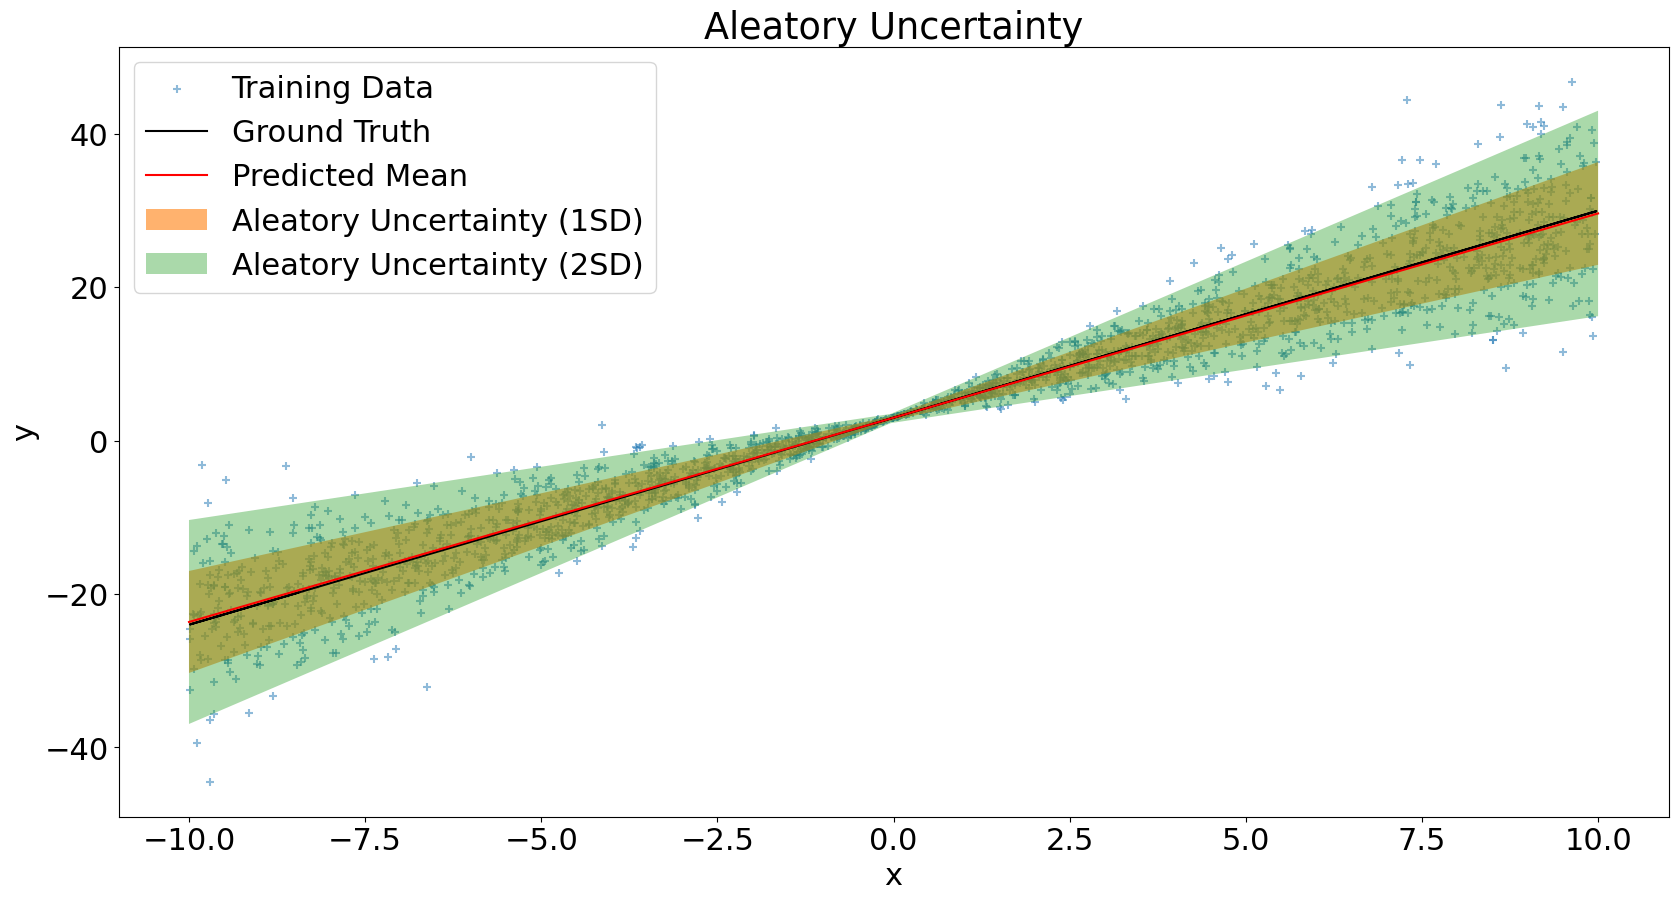

In [12]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(x_train, y_train, marker='+', label='Training Data', alpha=0.5)
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_mean, color='r', label='Predicted Mean')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+1*y_std), np.squeeze(y_mean-1*y_std),  alpha=0.6, label='Aleatory Uncertainty (1SD)')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+2*y_std), np.squeeze(y_mean-2*y_std),  alpha=0.4, label='Aleatory Uncertainty (2SD)')
plt.title('Aleatory Uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

---